# Mid-Term Project

#### Overview
- Use Medicare CCLF Claims from Syntegra dataset to answer key business questions
- Extra credit for building up on the questions below (additional questions + answers)
- One Jupyter notebook solution with clear Python code and all cell outputs available
- At least two data quality checks

## Step 0. Prepare raw input datasets

Here we will 1) load original datasets, 2) remove unused columns, 3) de-duplicate rows, and 4) join datasets, not necessarily in this order

Assumptions: 
- Claim ID (cur_clm_uniq_id) represents one claim, which may or may not have more than one code (code could be HCPCS/CPT, diagnosis, procedure...)
- There is a one-to-many relationship between patient IDs (bene_mbi_id) and claim IDs (cur_clm_uniq_id), i.e. each claim is unique to one patient, but one patient can have more than one claim

### 0.1 Import required packages

In [6]:
import numpy as np
import pandas as pd

In [8]:
# Turn off the automatic setting that redacts the columns/rows from the dataframe output
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 200)

### 0.2 Load & select columns to be used from raw (original) datasets

### 0.2.1 Load & select columns from Claims Header dataset

In [14]:
# Load Claims Header dataset
parta_claims_header_raw_df = pd.read_csv("C:/Users/rahul/Downloads/New folder/New folder/parta_claims_header.csv")
parta_claims_header_raw_df.sort_values(by=['cur_clm_uniq_id'])

,cur_clm_uniq_id,prvdr_oscar_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_bill_fac_type_cd,clm_bill_clsfctn_cd,prncpl_dgns_cd,admtg_dgns_cd,clm_mdcr_npmt_rsn_cd,clm_pmt_amt,clm_nch_prmry_pyr_cd,prvdr_fac_fips_st_cd,bene_ptnt_stus_cd,dgns_drg_cd,clm_op_srvc_type_cd,fac_prvdr_npi_num,oprtg_prvdr_npi_num,atndg_prvdr_npi_num,othr_prvdr_npi_num,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,bene_eqtbl_bic_hicn_num,clm_admsn_type_cd,clm_admsn_src_cd,clm_bill_freq_cd,clm_query_cd,dgns_prcdr_icd_ind,clm_mdcr_instnl_tot_chrg_amt,clm_mdcr_ip_pps_cptl_ime_amt,clm_oprtnl_ime_amt,clm_mdcr_ip_pps_dsprprtnt_amt,clm_hipps_uncompd_care_amt,clm_oprtnl_dsprtnt_amt
510,100190,111821,1228,NaN,40,2018-06-10,2018-06-10,7,7,M1611,NaN,NaN,127.79,NaN,11,1,NaN,F,1780608992,NaN,1.972732e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,415.80,NaN,NaN,NaN,NaN,NaN
521,100402,100226,1261,NaN,60,2017-05-27,2017-06-02,1,1,K5733,K5733,NaN,10602.46,NaN,10,6,330.0,NaN,1689611501,NaN,1.285688e+09,NaN,NaN,NaN,NaN,NaN,1.0,1,1,3,0,70795.63,609.13,0.00,13.92,231.15,NaN
525,100464,360051,12978,NaN,40,2017-06-26,2017-06-26,1,3,R079,NaN,NaN,199.45,NaN,36,1,NaN,C,1073688354,NaN,1.982693e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,2709.80,NaN,NaN,NaN,NaN,NaN
536,100698,140276,11789,NaN,40,2017-07-28,2017-07-28,1,3,M545,NaN,NaN,85.25,NaN,14,1,NaN,C,1376521575,NaN,1.912991e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,115.00,NaN,NaN,NaN,NaN,NaN
540,100750,230216,12138,NaN,40,2018-01-13,2018-01-13,1,3,Z0289,NaN,N,0.00,NaN,23,9,NaN,C,1982685384,NaN,1.063442e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,226.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1698691,390145,10007,NaN,40,2016-12-11,2016-12-11,1,3,Z01818,NaN,NaN,43.01,NaN,39,1,NaN,C,1689691214,NaN,1.679505e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,235.00,NaN,NaN,NaN,NaN,NaN
4365,1698722,200021,10985,NaN,40,2018-06-16,2018-06-16,1,3,E782,NaN,NaN,179.09,NaN,20,1,NaN,C,1932164795,NaN,1.548289e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,1939.35,NaN,NaN,NaN,NaN,NaN
4366,1698935,210022,1297,NaN,40,2018-04-06,2018-04-06,1,3,I110,NaN,NaN,400.81,NaN,21,9,NaN,C,1205896446,NaN,1.922016e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,554.00,NaN,NaN,NaN,NaN,NaN
4367,1699005,100057,12194,NaN,40,2016-04-27,2016-04-27,1,3,I348,NaN,NaN,265.19,NaN,10,1,NaN,C,1821019571,NaN,1.437130e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,8423.00,NaN,NaN,NaN,NaN,NaN


#### Data Quality Check #1: If true, the original dataset was unique on claim ID

In [16]:
parta_claims_header_raw_df_count = parta_claims_header_raw_df.shape[0]
parta_claims_header_raw_uniq_clm_id_df = parta_claims_header_raw_df['cur_clm_uniq_id'].drop_duplicates()

parta_claims_header_raw_df_count == parta_claims_header_raw_uniq_clm_id_df.shape[0]

True

In [18]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
parta_claims_header_df = parta_claims_header_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'atndg_prvdr_npi_num', 
    'clm_from_dt', 'prncpl_dgns_cd', 'clm_pmt_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'atndg_prvdr_npi_num': 'npi_id'
    }
)
parta_claims_header_df

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt
0,1001595,10226,1.366492e+09,2018-02-28,M25551,259.01
1,1004555,10133,1.942275e+09,2018-11-02,Z9861,29.56
2,1011605,10163,1.578546e+09,2018-01-02,C439,45.88
3,1011758,1003,1.952368e+09,2018-06-12,R310,9.40
4,101424,10052,1.336125e+09,2016-04-13,L821,34.18
...,...,...,...,...,...,...
8621,999774,10367,NaN,2017-11-06,R072,374.08
8622,999808,10496,1.740225e+09,2017-07-19,R079,360.89
8623,999878,12160,1.497784e+09,2018-01-18,R5383,90.73
8624,999961,12090,1.083691e+09,2018-03-10,C73,329.44


#### Data Quality Check #2: If true, the filtered dataset did not have any duplicates

In [8]:
parta_claims_header_df_count = parta_claims_header_df.shape[0]

parta_claims_header_raw_df_count == parta_claims_header_df_count

True

#### Data Quality Check #3: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [9]:
parta_claims_header_df.loc[~parta_claims_header_df.prncpl_dgns_cd.notnull()]

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt


### 0.2.2 Load & select columns from Claims Revenue Center dataset

In [20]:
# Load Claims Revenue Center dataset
# Note this dataset has more than one record for each claim ID (cur_clm_uniq_id)
# Also note there are two sets of date columns, 
#  one for claim ID (clm_from/thru_dt) and one for claim line (clm_line_from/thru_dt)
parta_claims_revenue_center_detail_raw_df = pd.read_csv(
    "C:/Users/rahul/Downloads/New folder/New folder/parta_claims_revenue_center_detail.csv"
)
parta_claims_revenue_center_detail_raw_df.sort_values(by=['cur_clm_uniq_id'])

C:\Users\rahul\AppData\Local\Temp\ipykernel_10068\3034031869.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  parta_claims_revenue_center_detail_raw_df = pd.read_csv(


,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd
318,100073,1,12620,NaN,40,2018-12-02 00:00:00,2018-12-02 00:00:00,403,2018-12-02 00:00:00,77063,NaN,NaN,2018-12-02 00:00:00,2018-12-02 00:00:00,1,24.11,NaN,NaN,NaN,NaN,NaN,00000
383,100184,1,10080,NaN,40,2018-09-06 00:00:00,2018-09-06 00:00:00,1,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,2018-09-06 00:00:00,0,0.00,NaN,NaN,NaN,NaN,NaN,00000
384,100190,1,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,G0467,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,133.74,NaN,NaN,NaN,NaN,NaN,00000
385,100190,2,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,98960,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000
386,100190,3,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,J1100,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,4,0.00,NaN,NaN,NaN,NaN,NaN,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29896,1699197,2,1177,NaN,40,2016-05-22 00:00:00,2016-05-22 00:00:00,302,2016-05-22 00:00:00,86592,NaN,NaN,2016-05-22 00:00:00,2016-05-22 00:00:00,1,5.43,NaN,NaN,NaN,NaN,NaN,00000
29898,1699212,1,1262,NaN,60,2018-12-24 00:00:00,2018-12-25 00:00:00,730,NaN,NaN,NaN,NaN,2018-12-24 00:00:00,2018-12-25 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,00000
29901,1699236,3,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,370,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,2,0.00,NaN,NaN,NaN,NaN,NaN,00000
29899,1699236,1,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,258,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000


#### Data Quality Check #4: If the resulting dataframe is empty, it means there is no difference between columns 'clm_line_from_dt' and 'clm_from_dt' for all the rows

In [23]:
parta_claims_revenue_center_detail_raw_df.loc[
    ~(parta_claims_revenue_center_detail_raw_df['clm_line_from_dt'] 
      == parta_claims_revenue_center_detail_raw_df['clm_from_dt'])
]

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd


In [25]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Select 'clm_from_dt' as the column for claim dates since we want uniqueness on claim ID, not claim line
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_from_dt',
    'clm_line_hcpcs_cd', 'clm_line_cvrd_pd_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code'
    }
)
parta_claims_revenue_center_detail_df

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.00
1,1001595,10226,2018-02-28 00:00:00,G0283,9.67
7,1001595,10226,2018-02-28 00:00:00,G8978,0.00
8,1001595,10226,2018-02-28 00:00:00,G8979,0.00
10,1001595,10226,2018-02-28 00:00:00,97110,24.97
...,...,...,...,...,...
59414,999961,12090,2018-03-10 00:00:00,A9516,0.00
59415,999961,12090,2018-03-10 00:00:00,G8996,0.00
59416,999976,10768,2016-01-18 00:00:00,80053,11.37
59417,999976,10768,2016-01-18 00:00:00,80061,12.83


#### Data Quality Check #5: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [28]:
parta_claims_revenue_center_detail_df.loc[
    ~parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.0
25,1001595,10226,2018-02-28 00:00:00,NaN,0.0
29,1004555,10133,2018-11-02 00:00:00,NaN,0.0
30,1004904,10106,2018-02-26 00:00:00,NaN,0.0
32,100974,10042,2017-02-20 00:00:00,NaN,0.0
...,...,...,...,...,...
59369,999008,12473,2018-08-04 00:00:00,NaN,0.0
59402,999774,10367,2017-11-06 00:00:00,NaN,0.0
59407,999808,10496,2017-07-19 00:00:00,NaN,0.0
59410,999943,11021,2016-11-20 00:00:00,NaN,0.0


In [30]:
# Data Quality Check #5 failed, so remove rows with no HCPCS codes
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_df.loc[
    parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

In [32]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(
    parta_claims_revenue_center_detail_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_claims_revenue_center_detail_df

C:\Users\rahul\AppData\Local\Temp\ipykernel_10068\2671745514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(


,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
1,1001595,10226,2018-02-28,G0283,9.67
7,1001595,10226,2018-02-28,G8978,0.00
8,1001595,10226,2018-02-28,G8979,0.00
10,1001595,10226,2018-02-28,97110,24.97
18,1001595,10226,2018-02-28,97140,20.33
...,...,...,...,...,...
59413,999961,12090,2018-03-10,78014,400.05
59414,999961,12090,2018-03-10,A9516,0.00
59415,999961,12090,2018-03-10,G8996,0.00
59416,999976,10768,2016-01-18,80053,11.37


#### Mini-Analysis #1: Find whether there are matching claims between Claim Header and Claims Revenue Center datasets

                                                ***

In [36]:
claims_header_unique_claims_df = parta_claims_header_df[[
    'claim_id'
]].drop_duplicates()

claims_header_unique_claims_df['header'] = 1

revenue_center_unique_claims_df = parta_claims_revenue_center_detail_df[[
    'claim_id'
]].drop_duplicates()

revenue_center_unique_claims_df['revenue'] = 1

joined_df1 = pd.merge(
    claims_header_unique_claims_df,
    revenue_center_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df1

,claim_id,header,revenue
0,100073,NaN,1.0
1,100190,1.0,1.0
2,100227,NaN,1.0
3,100402,1.0,NaN
4,100464,1.0,1.0
...,...,...,...
15721,1699137,NaN,1.0
15722,1699155,NaN,1.0
15723,1699195,NaN,1.0
15724,1699197,NaN,1.0


In [38]:
print('# of unique claims in Claims Header dataset: ' 
      + str(claims_header_unique_claims_df.shape[0])
     )
print('# of unique claims in Claims Revenue Center dataset: ' 
      + str(revenue_center_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header dataset: 8626
# of unique claims in Claims Revenue Center dataset: 13406


In [40]:
print('# of unique claims in Claims Header and Claims Revenue Center datasets combined: ' 
      + str(joined_df1.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only Claims Header dataset: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & ~(joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in only Claims Revenue Center dataset: ' 
      + str(joined_df1.loc[~(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in both Claims Header AND Claims Revenue Center datasets: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )

# of unique claims in Claims Header and Claims Revenue Center datasets combined: 15726
From combined list of unique claims - 
# of unique claims in only Claims Header dataset: 2320
# of unique claims in only Claims Revenue Center dataset: 7100
# of unique claims in both Claims Header AND Claims Revenue Center datasets: 6306


Conclusion: There are quite a number of claims available in both datasets, so join them on claim ID as an outer join to get all possible claims without duplicates

                                                ***

### 0.2.3 Load & select columns from Diagnosis dataset

In [49]:
# Load the Diagnosis dataset
# Note that 'clm_from_dt' has some records with null values, but we need claim dates for all claims
parta_diagnosis_code_raw_df = pd.read_csv("C:/Users/rahul/Downloads/New folder/New folder/parta_diagnosis_code.csv")
parta_diagnosis_code_raw_df.sort_values(by=['cur_clm_uniq_id', 'clm_val_sqnc_num'])

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_prod_type_cd,clm_val_sqnc_num,clm_dgns_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_poa_ind,dgns_prcdr_icd_ind
244,100190,1228,NaN,40,NaN,1,M1611,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
243,100190,1228,NaN,40,NaN,2,M25572,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
246,100190,1228,NaN,40,NaN,3,M25551,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
245,100190,1228,NaN,40,NaN,4,M5136,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
366,100402,1261,NaN,60,NaN,11,E119,NaN,100256.0,2017-05-28 00:00:00,2017-06-02 00:00:00,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16232,1699102,11842,NaN,60,NaN,13,Z8673,NaN,330191.0,2017-01-31 00:00:00,2017-02-03 00:00:00,0,0
16236,1699137,10873,NaN,40,NaN,1,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16235,1699137,10873,NaN,40,NaN,2,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16237,1699155,11689,NaN,40,NaN,3,K219,NaN,NaN,NaN,2018-12-06 00:00:00,NaN,0


In [51]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Use 'clm_thru_dt' as claim date columns since 'clm_from_dt' has some nulls
parta_diagnosis_code_df = parta_diagnosis_code_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_thru_dt', 'clm_dgns_cd'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_thru_dt': 'claim_date'
    }
)
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30 00:00:00,K5289
1,1001595,10226,2018-02-28 00:00:00,M25551
2,1001595,10226,2018-02-28 00:00:00,M79604
3,1001865,10133,2018-09-14 00:00:00,G459
4,1004555,10133,2018-11-02 00:00:00,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18 00:00:00,N390
32048,999943,11021,2016-11-20 00:00:00,M545
32049,999961,12090,2018-03-10 00:00:00,C73
32050,999962,11030,2018-07-17 00:00:00,G8194


#### Data Quality Check #6: If the resulting dataframe is empty, it means all the records have values for 'clm_thru_dt' (if it's not empty it should be removed now since without claim dates it'd be difficult to use)

In [54]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.claim_date.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


#### Data Quality Check #7: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [57]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.clm_dgns_cd.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


In [59]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_diagnosis_code_df['claim_date'] = pd.to_datetime(
    parta_diagnosis_code_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30,K5289
1,1001595,10226,2018-02-28,M25551
2,1001595,10226,2018-02-28,M79604
3,1001865,10133,2018-09-14,G459
4,1004555,10133,2018-11-02,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18,N390
32048,999943,11021,2016-11-20,M545
32049,999961,12090,2018-03-10,C73
32050,999962,11030,2018-07-17,G8194


#### Mini-Analysis #2: Find whether there are matching claims between above two datasets and the Diagnosis dataset

                                                ***

In [63]:
diagnosis_unique_claims_df = parta_diagnosis_code_df[[
    'claim_id'
]].drop_duplicates()

diagnosis_unique_claims_df['diagnosis'] = 1

joined_df2 = pd.merge(
    joined_df1,
    diagnosis_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df2

,claim_id,header,revenue,diagnosis
0,100073,NaN,1.0,NaN
1,100190,1.0,1.0,1.0
2,100227,NaN,1.0,NaN
3,100402,1.0,NaN,1.0
4,100464,1.0,1.0,1.0
...,...,...,...,...
19452,1699137,NaN,1.0,1.0
19453,1699155,NaN,1.0,1.0
19454,1699195,NaN,1.0,NaN
19455,1699197,NaN,1.0,NaN


In [65]:
print('# of unique claims in Claims Header+Claims Revenue Center datasets: ' 
      + str(joined_df1.shape[0])
     )
print('# of unique claims in Diagnosis dataset: ' 
      + str(diagnosis_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center datasets: 15726
# of unique claims in Diagnosis dataset: 13432


In [67]:
print('# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: ' 
      + str(joined_df2.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims only in either Claims Header or Claims Revenue Center datasets: ' 
      + str(joined_df2.loc[
          ((joined_df2.header == 1) | (joined_df2.revenue == 1))
          & ~(joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in only Diagnosis dataset: ' 
      + str(joined_df2.loc[
          (~(joined_df2.header == 1) & ~(joined_df2.revenue == 1))
          & (joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in all three datasets: ' 
      + str(joined_df2.loc[
          (joined_df2.header == 1) & (joined_df2.revenue == 1) & (joined_df2.diagnosis == 1)
      ].shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: 19457
From combined list of unique claims - 
# of unique claims only in either Claims Header or Claims Revenue Center datasets: 6025
# of unique claims in only Diagnosis dataset: 3731
# of unique claims in all three datasets: 5266


Conclusion: There are quite a number of claims available in all three datasets, so join diagnosis to the first two datasets on claim ID as an outer join to get all possible claims without duplicates

                                                ***

### 0.2.4 Load & select columns from Procedure dataset

In [74]:
# Load the Procedure dataset
parta_procedure_code_df = pd.read_csv("C:/Users/rahul/Downloads/New folder/New folder/parta_procedure_code.csv")
parta_procedure_code_df

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_val_sqnc_num,clm_prcdr_cd,clm_prcdr_prfrm_dt,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,dgns_prcdr_icd_ind
0,100402,1261,NaN,60,1,0DJD8ZZ,2017-05-31 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
1,100402,1261,NaN,60,2,0D9670Z,2017-05-29 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
2,100402,1261,NaN,60,3,0DJD8ZZ,2017-06-01 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
3,100402,1261,NaN,60,4,0DB78ZX,2017-05-30 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
4,1008371,1074,NaN,60,1,0T9B7ZZ,2016-12-03 00:00:00,NaN,140007,2016-12-02 00:00:00,2016-12-08 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,357821,10200,NaN,60,2,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
458,357821,10200,NaN,60,1,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
459,412998,10106,NaN,60,1,0SRC0J9,2016-12-09 00:00:00,NaN,250104,2016-12-09 00:00:00,2016-12-10 00:00:00,0
460,460114,10133,NaN,60,1,0QSH04Z,2018-05-17 00:00:00,NaN,150112,2018-05-07 00:00:00,2018-05-23 00:00:00,0


Conclusion: Don't join procedure dataset since the only useful info for sake of this analysis is the procedure codes and we won't be using them in our analysis

### 0.2.5 Load & select columns from DME dataset

In [78]:
# Load the DME dataset
partb_dme_raw_df = pd.read_csv("C:/Users/rahul/Downloads/New folder/New folder/partb_dme.csv")
partb_dme_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_prmry_pyr_cd,payto_prvdr_npi_num,ordrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_disp_cd
267,100441,1,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4256,3.24,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,3.98,1
268,100441,2,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,E0607,59.80,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,76.54,1
269,100441,3,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4253,38.57,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,49.92,1
270,100441,4,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4259,4.20,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,4.80,1
271,100441,5,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4258,2.27,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,2.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1696080,2,11689,NaN,82,2016-11-18,2016-11-18,P,12,2016-11-18,2016-11-18,A7038,0.00,NaN,1376599084,1.659342e+09,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
129,1696545,1,10046,NaN,82,2017-07-25,2017-07-25,R,12,2017-07-25,2017-07-25,E0570,6.30,NaN,1346347374,1.952397e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,8.12,1
1548,1696792,1,12086,NaN,82,2018-12-23,2018-12-23,P,12,2018-12-23,2018-12-23,A4604,35.58,NaN,1790823722,1.518936e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,48.17,1
1549,1697987,1,11074,NaN,82,2018-04-06,2018-04-06,P,12,2018-04-06,2018-04-06,A4253,27.92,NaN,1902842065,1.750382e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,33.28,1


In [80]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
partb_dme_df = partb_dme_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'ordrg_prvdr_npi_num',
    'clm_from_dt', 'clm_line_hcpcs_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'ordrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code',
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,18.75
...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,4.26


#### Data Quality Check #8: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [83]:
partb_dme_df.loc[~partb_dme_df.hcpcs_code.notnull()]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost


#### Mini-Analysis #3: Find whether there are matching claims between the first three datasets above and the DME dataset

                                                ***

In [87]:
dme_unique_claims_df = partb_dme_df[[
    'claim_id'
]].drop_duplicates()

dme_unique_claims_df['dme'] = 1

joined_df3 = pd.merge(
    joined_df2,
    dme_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df3

,claim_id,header,revenue,diagnosis,dme
0,100073,NaN,1.0,NaN,NaN
1,100190,1.0,1.0,1.0,NaN
2,100227,NaN,1.0,NaN,NaN
3,100402,1.0,NaN,1.0,NaN
4,100441,NaN,NaN,NaN,1.0
...,...,...,...,...,...
20960,1699137,NaN,1.0,1.0,NaN
20961,1699155,NaN,1.0,1.0,NaN
20962,1699195,NaN,1.0,NaN,NaN
20963,1699197,NaN,1.0,NaN,NaN


In [89]:
print('# of unique claims in first three datasets: ' 
      + str(joined_df2.shape[0])
     )
print('# of unique claims in DME dataset: ' 
      + str(dme_unique_claims_df.shape[0])
     )

# of unique claims in first three datasets: 19457
# of unique claims in DME dataset: 1508


In [91]:
print('# of unique claims in the four datasets combined: ' 
      + str(joined_df3.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & ~(joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in only DME dataset: ' 
      + str(joined_df3.loc[
          ~(joined_df3.header == 1) 
          & ~(joined_df3.revenue == 1)
          & ~(joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in all four datasets: ' 
      + str(joined_df3.loc[
          (joined_df3.header == 1) 
          & (joined_df3.revenue == 1)
          & (joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in DME and any of the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & (joined_df3.dme == 1)
      ].shape[0])
     )

# of unique claims in the four datasets combined: 20965
From combined list of unique claims - 
# of unique claims in only the first three datasets: 19457
# of unique claims in only DME dataset: 1508
# of unique claims in all four datasets: 0
# of unique claims in DME and any of the first three datasets: 0


Conclusion: None of the claims from DME is in any of the first three datasets, so append them to the output after joining the first three datasets

                                                ***

### 0.2.6 Load & select columns from Physicians dataset

In [96]:
# Load the Physicians dataset

partb_physicians_raw_df = pd.read_csv("C:/Users/rahul/Downloads/New folder/New folder/partb_physicians.csv")
partb_physicians_raw_df.sort_values(by='cur_clm_uniq_id')


,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,rndrg_prvdr_type_cd,rndrg_prvdr_fips_st_cd,clm_prvdr_spclty_cd,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_line_prmry_pyr_cd,clm_line_dgns_cd,clm_rndrg_prvdr_tax_num,rndrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_line_srvc_unit_qty,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_disp_cd,clm_dgns_1_cd,clm_dgns_2_cd,clm_dgns_3_cd,clm_dgns_4_cd,clm_dgns_5_cd,clm_dgns_6_cd,clm_dgns_7_cd,clm_dgns_8_cd,dgns_prcdr_icd_ind,clm_dgns_9_cd,clm_dgns_10_cd,clm_dgns_11_cd,clm_dgns_12_cd,hcpcs_betos_cd
520,100020,1,1070,NaN,71,10/4/2016,10/4/2016,5,36,69,5,81,10/4/2016,10/4/2016,85610,5.10,NaN,I482,NaN,1.619972e+09,1,A,NaN,NaN,NaN,NaN,NaN,5.49,1.0,NaN,NaN,NaN,NaN,NaN,1,I482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1H
525,100024,1,11654,NaN,71,12/10/2016,12/10/2016,1,39,26,T,11,12/10/2016,12/10/2016,90834,61.17,NaN,F319,NaN,1.811965e+09,1,A,NaN,NaN,NaN,NaN,NaN,79.36,1.0,NaN,NaN,NaN,NaN,NaN,1,F319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M5B
529,100030,1,12052,NaN,71,4/15/2017,4/15/2017,1,5,6,5,21,4/15/2017,4/15/2017,93010,6.92,NaN,R001,NaN,1.336344e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.53,1.0,NaN,NaN,NaN,NaN,NaN,1,R001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T2A
555,100038,1,12345,NaN,71,7/2/2018,7/2/2018,1,34,30,4,19,7/2/2018,7/2/2018,72158,89.30,NaN,M47816,NaN,1.295730e+09,1,A,NaN,NaN,NaN,NaN,NaN,112.57,1.0,26,NaN,NaN,NaN,NaN,1,M47816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I2D
592,100061,1,10252,NaN,71,7/4/2016,7/4/2016,1,33,48,1,11,7/4/2016,7/4/2016,99213,65.83,NaN,L03032,NaN,1.861493e+09,1,A,NaN,NaN,NaN,NaN,NaN,82.36,1.0,NaN,NaN,NaN,NaN,NaN,1,L03032,B351,L853,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,1699176,1,1008,NaN,71,10/18/2018,10/18/2018,1,18,29,1,21,10/18/2018,10/18/2018,99232,56.62,NaN,J9601,NaN,1.730182e+09,1,A,NaN,NaN,NaN,NaN,NaN,73.06,1.0,NaN,NaN,NaN,NaN,NaN,1,J9601,J810,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M2B
66051,1699182,1,13175,NaN,71,11/21/2016,11/21/2016,5,31,69,5,81,11/21/2016,11/21/2016,80053,7.43,NaN,E782,NaN,1.063497e+09,1,A,NaN,NaN,NaN,NaN,NaN,7.87,1.0,NaN,NaN,NaN,NaN,NaN,1,E782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1B
66052,1699186,1,10710,NaN,71,1/18/2016,1/18/2016,1,14,30,4,23,1/18/2016,1/18/2016,73110,7.41,NaN,S52502A,NaN,1.427027e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.97,1.0,26,LT,NaN,NaN,NaN,1,S52502A,S52602A,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I1B
66053,1699204,1,11540,NaN,71,5/8/2018,5/8/2018,1,28,13,1,11,5/8/2018,5/8/2018,99214,80.42,NaN,M5116,NaN,1.275519e+09,1,A,NaN,NaN,NaN,NaN,NaN,101.91,1.0,NaN,NaN,NaN,NaN,NaN,1,M5116,M47816,M48061,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B


In [98]:
#Possible expansio of analysis - keep as side note

partb_physicians_raw_df.groupby('clm_pos_cd').agg(
    uniq_clm_cnt=('cur_clm_uniq_id', 'nunique')
).sort_values(by='uniq_clm_cnt', ascending=False)

,uniq_clm_cnt
clm_pos_cd,
11,34209
81,17512
22,7218
21,6171
23,4505
24,1912
41,1619
19,1435
31,891


In [100]:
# Select only the desired columns and remove duplicates if any
partb_physicians_df = partb_physicians_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'rndrg_prvdr_npi_num', 'clm_from_dt', 
    'clm_line_hcpcs_cd', 'clm_line_dgns_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'rndrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code', 
        'clm_line_dgns_cd': 'diagnosis_code', 
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_physicians_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100117,10046,1.073515e+09,11/19/2016,83861,H04123,0.00
1,1001777,10133,1.053398e+09,12/15/2016,99213,I480,69.50
2,1001907,10113,1.245238e+09,2/9/2017,11721,B351,43.37
3,1002867,10049,1.255316e+09,9/23/2017,88312,D0359,143.39
4,1002871,10026,1.265419e+09,3/11/2016,87086,N390,10.66
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,5/3/2018,99214,E782,105.49
130695,999919,12345,1.962494e+09,5/3/2018,90732,Z23,108.14
130696,999919,12345,1.962494e+09,5/3/2018,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,9/24/2016,66984,H2512,838.19


#### Data Quality Check #9: If the resulting dataframe is empty, it means all the records have HCPCS or diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [103]:
partb_physicians_df.loc[
    (~partb_physicians_df.hcpcs_code.notnull()) | (~partb_physicians_df.diagnosis_code.notnull())
]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost


#### Mini-Analysis #4: Find whether there are matching claims between above four datasets and the Physicians dataset

                                                ***

In [107]:
physicians_unique_claims_df = partb_physicians_df[[
    'claim_id'
]].drop_duplicates()

physicians_unique_claims_df['physicians'] = 1

joined_df4 = pd.merge(
    joined_df3,
    physicians_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df4

,claim_id,header,revenue,diagnosis,dme,physicians
0,100020,NaN,NaN,NaN,NaN,1.0
1,100024,NaN,NaN,NaN,NaN,1.0
2,100030,NaN,NaN,NaN,NaN,1.0
3,100038,NaN,NaN,NaN,NaN,1.0
4,100061,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
97953,1699195,NaN,1.0,NaN,NaN,NaN
97954,1699197,NaN,1.0,NaN,NaN,NaN
97955,1699204,NaN,NaN,NaN,NaN,1.0
97956,1699222,NaN,NaN,NaN,NaN,1.0


In [109]:
print('# of unique claims in first four datasets: ' 
      + str(joined_df3.shape[0])
     )
print('# of unique claims in Physicians dataset: ' 
      + str(physicians_unique_claims_df.shape[0])
     )

# of unique claims in first four datasets: 20965
# of unique claims in Physicians dataset: 76993


In [111]:
print('# of unique claims in the five datasets combined: ' 
      + str(joined_df4.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & ~(joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in only Physicians dataset: ' 
      + str(joined_df4.loc[
          ~(joined_df4.header == 1) 
          & ~(joined_df4.revenue == 1)
          & ~(joined_df4.diagnosis == 1)
          & ~(joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in all five datasets: ' 
      + str(joined_df4.loc[
          (joined_df4.header == 1) 
          & (joined_df4.revenue == 1)
          & (joined_df4.diagnosis == 1)
          & (joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in Physicians and any of the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & (joined_df4.physicians == 1)
      ].shape[0])
     )

# of unique claims in the five datasets combined: 97958
From combined list of unique claims - 
# of unique claims in only the first four datasets: 20965
# of unique claims in only Physicians dataset: 76993
# of unique claims in all five datasets: 0
# of unique claims in Physicians and any of the first four datasets: 0


Conclusion: None of the claims from Physicians is in any of the first four datasets, so append them to the output after combining the first four datasets

                                                ***

### 0.2.7 Load & select columns from Patients dataset

In [120]:
# Load the Patients dataset
# For sake of simplicity in concept, beneficiary = patient
beneficiary_demographics_df = pd.read_csv("C:/Users/rahul/Downloads/New folder/New folder/beneficiary_demographics.csv")
beneficiary_demographics_df

,bene_mbi_id,bene_member_month,bene_hic_num,bene_fips_state_cd,bene_fips_cnty_cd,bene_zip_cd,bene_dob,bene_sex_cd,bene_race_cd,bene_age,bene_mdcr_stus_cd,bene_dual_stus_cd,bene_death_dt,bene_rng_bgn_dt,bene_rng_end_dt,bene_1st_name,bene_midl_name,bene_last_name,bene_orgnl_entlmt_rsn_cd,bene_entlmt_buyin_ind,bene_part_a_enrlmt_bgn_dt,bene_part_b_enrlmt_bgn_dt,bene_line_1_adr,bene_line_2_adr,bene_line_3_adr,bene_line_4_adr,bene_line_5_adr,bene_line_6_adr,geo_zip_plc_name,geo_usps_state_cd,geo_zip5_cd,geo_zip4_cd
0,10,2016-01-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
1,10,2016-02-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
2,10,2016-03-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
3,10,2016-04-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
4,10,2016-05-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31179,13380,2018-02-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31180,13380,2018-03-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31181,13380,2018-04-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31182,13380,2018-05-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN


In [122]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
beneficiary_demographics_df = beneficiary_demographics_df[[
    'bene_mbi_id', 'bene_dob', 'bene_sex_cd'
]].drop_duplicates().rename(
    columns={
        'bene_mbi_id': 'patient_id',
        'bene_dob': 'patient_birth_date'
    }
)
beneficiary_demographics_df

,patient_id,patient_birth_date,bene_sex_cd
0,10,1945-05-16 00:00:00,1
34,10007,1956-01-04 00:00:00,2
63,10010,1932-12-03 00:00:00,2
95,10013,1952-08-23 00:00:00,2
131,10017,1984-11-23 00:00:00,1
...,...,...,...
31037,13374,1948-07-11 00:00:00,2
31072,13376,1952-11-28 00:00:00,2
31103,13377,1956-01-16 00:00:00,1
31122,13379,1926-12-10 00:00:00,2


In [124]:
# Gender code as identified by the CMS CCLF resource (1 = male, 2 = female, 0 = Unknown = N/A)
# Convert gender code into readable acronym and drop original column
beneficiary_demographics_df['patient_gender'] = ''
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 1, 'patient_gender'] = 'M'
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 2, 'patient_gender'] = 'F'
beneficiary_demographics_df = beneficiary_demographics_df.drop('bene_sex_cd', axis=1)
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16 00:00:00,M
34,10007,1956-01-04 00:00:00,F
63,10010,1932-12-03 00:00:00,F
95,10013,1952-08-23 00:00:00,F
131,10017,1984-11-23 00:00:00,M
...,...,...,...
31037,13374,1948-07-11 00:00:00,F
31072,13376,1952-11-28 00:00:00,F
31103,13377,1956-01-16 00:00:00,M
31122,13379,1926-12-10 00:00:00,F


In [126]:
# Update date format for patient birth dates to match that of other date columns
beneficiary_demographics_df['patient_birth_date'] = pd.to_datetime(
    beneficiary_demographics_df['patient_birth_date']
).dt.strftime('%Y-%m-%d')
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16,M
34,10007,1956-01-04,F
63,10010,1932-12-03,F
95,10013,1952-08-23,F
131,10017,1984-11-23,M
...,...,...,...
31037,13374,1948-07-11,F
31072,13376,1952-11-28,F
31103,13377,1956-01-16,M
31122,13379,1926-12-10,F


#### Mini-Analysis #5: Find whether there are matching patients between the claims datasets and the Patients dataset

                                                ***

In [130]:
claims_header_unique_patients_df = parta_claims_header_df[[
    'patient_id'
]].drop_duplicates()

claims_header_unique_patients_df['header'] = 1

revenue_center_unique_patients_df = parta_claims_revenue_center_detail_df[[
    'patient_id'
]].drop_duplicates()

revenue_center_unique_patients_df['revenue'] = 1

diagnosis_unique_patients_df = parta_diagnosis_code_df[[
    'patient_id'
]].drop_duplicates()

diagnosis_unique_patients_df['diagnosis'] = 1

dme_unique_patients_df = partb_dme_df[[
    'patient_id'
]].drop_duplicates()

dme_unique_patients_df['dme'] = 1

physicians_unique_patients_df = partb_physicians_df[[
    'patient_id'
]].drop_duplicates()

physicians_unique_patients_df['physicians'] = 1

beneficiary_unique_patients_df = beneficiary_demographics_df[[
    'patient_id'
]].drop_duplicates()

beneficiary_unique_patients_df['beneficiary'] = 1

joined_patients_df = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    claims_header_unique_patients_df,
                    revenue_center_unique_patients_df,
                    on='patient_id', how = 'outer'
                ),
                diagnosis_unique_patients_df,
                on='patient_id', how = 'outer'
            ),
            dme_unique_patients_df,
            on='patient_id', how = 'outer'
        ),
        physicians_unique_patients_df,
        on='patient_id', how = 'outer'
    ),
    beneficiary_unique_patients_df,
    on='patient_id', how = 'outer'
)

joined_patients_df

,patient_id,header,revenue,diagnosis,dme,physicians,beneficiary
0,10,1.0,1.0,1.0,NaN,1.0,1
1,12,NaN,NaN,NaN,NaN,NaN,1
2,13,1.0,1.0,1.0,1.0,1.0,1
3,102,1.0,1.0,1.0,NaN,1.0,1
4,109,1.0,1.0,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...
995,13374,1.0,1.0,1.0,NaN,1.0,1
996,13376,1.0,1.0,1.0,NaN,1.0,1
997,13377,1.0,1.0,1.0,1.0,1.0,1
998,13379,NaN,NaN,NaN,NaN,1.0,1


In [132]:
print('# of unique patients in the five datasets combined: ' 
      + str(joined_patients_df.shape[0])
     )
print('From combined list of unique patients - ')
print('# of unique patients in only the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & ~(joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in only Beneficiary dataset: ' 
      + str(joined_patients_df.loc[
          ~(joined_patients_df.header == 1) 
          & ~(joined_patients_df.revenue == 1)
          & ~(joined_patients_df.diagnosis == 1)
          & ~(joined_patients_df.dme == 1)
          & ~(joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in all five datasets: ' 
      + str(joined_patients_df.loc[
          (joined_patients_df.header == 1) 
          & (joined_patients_df.revenue == 1)
          & (joined_patients_df.diagnosis == 1)
          & (joined_patients_df.dme == 1)
          & (joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in Beneficiary and any of the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )

# of unique patients in the five datasets combined: 1000
From combined list of unique patients - 
# of unique patients in only the claims datasets: 0
# of unique patients in only Beneficiary dataset: 38
# of unique patients in all five datasets: 276
# of unique patients in Beneficiary and any of the claims datasets: 962


Conclusion: Most of the patients have some claims, so we can join the beneficiary dataset to the claims to get some of the patient demographics, i.e. age and gender

                                                ***

### 0.3 Combine all datasets

### 0.3.1. Join datasets with common records

In [138]:
# Join Claims Header and Claims Revenue Center datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    parta_claims_header_df,
    parta_claims_revenue_center_detail_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt
0,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11
1,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,G0467,133.74
2,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,98960,0.00
3,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1100,0.00
4,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1885,0.00
...,...,...,...,...,...,...,...,...
38387,1699195,10958,NaN,2017-04-19,NaN,NaN,88342,0.00
38390,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00
38392,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43
38391,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00


In [140]:
# Join Medicare and Diagnosis datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    medicare_df,
    parta_diagnosis_code_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,clm_dgns_cd
0,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11,NaN
24,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M25551
23,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M5136
22,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M1611
21,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M25572
...,...,...,...,...,...,...,...,...,...
106778,1699195,10958,NaN,2017-04-19,NaN,NaN,88342,0.00,NaN
106781,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00,NaN
106783,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43,NaN
106782,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00,NaN


In [142]:
# Since Claims Header dataset has some principal diagnosis codes and the Diagnosis dataset 
#  supplements them with additional codes wherever possible, 
#  coalesce them with preference to the principal code from Claim Header dataset
# Once the diagnosis codes are combined into one column, remove the older columns and any duplicates
medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]
medicare_df = medicare_df.drop(['prncpl_dgns_cd', 'clm_dgns_cd'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

C:\Users\rahul\AppData\Local\Temp\ipykernel_10068\4291206876.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]


,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code
0,100073,12620,NaN,2018-12-02,NaN,77063,24.11,NaN
1,100190,1228,1.972732e+09,2018-06-10,127.79,G0467,133.74,M1611
5,100190,1228,1.972732e+09,2018-06-10,127.79,98960,0.00,M1611
9,100190,1228,1.972732e+09,2018-06-10,127.79,J1100,0.00,M1611
13,100190,1228,1.972732e+09,2018-06-10,127.79,J1885,0.00,M1611
17,100190,1228,1.972732e+09,2018-06-10,127.79,J2270,0.00,M1611
21,100190,1228,1.972732e+09,2018-06-10,127.79,99213,0.00,M1611
25,100227,12140,NaN,2018-10-24,NaN,J2785,0.00,NaN
26,100402,1261,1.285688e+09,2017-05-27,10602.46,NaN,NaN,K5733
27,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,R197


In [143]:
# Since Claims Header dataset records the amount Medicare paid for the claims 
#  and Claims Revenue Center dataset records the amount Medicare reimbursed the provider,
#  assume they were separate charges and add them to get the total cost for claim (for particular code)
# Once the costs are combined into one column, remove the older columns and any duplicates
medicare_df['claim_cost'] = medicare_df['clm_pmt_amt']+medicare_df['clm_line_cvrd_pd_amt']
medicare_df = medicare_df.drop(['clm_pmt_amt', 'clm_line_cvrd_pd_amt'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
17,100190,1228,1.972732e+09,2018-06-10,J2270,M1611,127.79
21,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79
25,100227,12140,NaN,2018-10-24,J2785,NaN,NaN
26,100402,1261,1.285688e+09,2017-05-27,NaN,K5733,NaN
27,100402,1261,NaN,2017-06-02,NaN,R197,NaN


In [144]:
claims_header_revenue_diagnosis_df_count = medicare_df.shape[0]

### 0.3.2 Append datasets with no common records

In [146]:
# Create a dummy column for diagnosis code in DME dataset before appending so the list of columns match
partb_dme_df['diagnosis_code'] = np.nan
partb_dme_df = partb_dme_df[[
    'claim_id', 'patient_id', 'npi_id', 'claim_date', 'hcpcs_code', 'diagnosis_code', 'claim_cost'
]]
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,NaN,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,NaN,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,NaN,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,NaN,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,NaN,18.75
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [147]:
# Append DME dataset to the first three claims datasets
medicare_df = pd.concat([medicare_df, partb_dme_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [153]:
claims_header_revenue_diagnosis_dme_df_count = medicare_df.shape[0]

#### Data Quality Check #10: If True, we appended DME dataset to the first three claims datasets without any unexpected rows accruing

In [156]:
partb_dme_df_count = partb_dme_df.shape[0]
claims_w_dme_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis: ' 
      + str(claims_header_revenue_diagnosis_df_count))
print('Claim count for DME: ' + str(partb_dme_df_count))
print('Expected claim count after appending DME dataset: ' 
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count))
print('Actual claim count after appending DME dataset: '
     + str(claims_w_dme_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count == claims_w_dme_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis: 66917
Claim count for DME: 2731
Expected claim count after appending DME dataset: 69648
Actual claim count after appending DME dataset: 69648
Expected and actual claim count matches: True


In [158]:
# Append Physicians dataset to the first four claims datasets
medicare_df = pd.concat([medicare_df, partb_physicians_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,5/3/2018,99214,E782,105.49
130695,999919,12345,1.962494e+09,5/3/2018,90732,Z23,108.14
130696,999919,12345,1.962494e+09,5/3/2018,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,9/24/2016,66984,H2512,838.19


#### Data Quality Check #11: If True, we appended Physicians dataset to the first four claims datasets without any unexpected rows accruing

In [178]:
partb_physicians_df_count = partb_physicians_df.shape[0]
claims_w_physicians_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis + DME: ' 
      + str(claims_header_revenue_diagnosis_dme_df_count))
print('Claim count for Physicians: ' + str(partb_physicians_df_count))
print('Expected claim count after appending Physicians dataset: ' 
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count))
print('Actual claim count after appending Physicians dataset: '
     + str(claims_w_physicians_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count 
           == claims_w_physicians_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis + DME: 69648
Claim count for Physicians: 128904
Expected claim count after appending Physicians dataset: 198552
Actual claim count after appending Physicians dataset: 198552
Expected and actual claim count matches: True


In [180]:
# Capture # records now to compare after joining patient details
medicare_claims_df_count = medicare_df.shape[0]

### 0.3.3 Join patient information

In [183]:
# Join claims data with patient details on patient ID
# Perform left join to only provide patient details for existing claims
medicare_df = pd.merge(
    medicare_df,
    beneficiary_demographics_df,
    on=['patient_id'], how='left'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date_x,patient_gender_x,patient_birth_date_y,patient_gender_y,patient_birth_date,patient_gender
70160,100020,1070,1.619972e+09,10/4/2016,85610,I482,5.49,1947-06-06,M,1947-06-06,M,1947-06-06,M
70165,100024,11654,1.811965e+09,12/10/2016,90834,F319,79.36,1977-11-08,M,1977-11-08,M,1977-11-08,M
70169,100030,12052,1.336344e+09,4/15/2017,93010,R001,8.53,1949-06-25,F,1949-06-25,F,1949-06-25,F
70195,100038,12345,1.295730e+09,7/2/2018,72158,M47816,112.57,1947-01-28,F,1947-01-28,F,1947-01-28,F
70230,100061,10252,1.861493e+09,7/4/2016,99213,L03032,82.36,1933-02-09,F,1933-02-09,F,1933-02-09,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66914,1699197,1177,NaN,2016-05-22,36415,NaN,NaN,1948-09-07,M,1948-09-07,M,1948-09-07,M
66915,1699197,1177,NaN,2016-05-22,86592,NaN,NaN,1948-09-07,M,1948-09-07,M,1948-09-07,M
134759,1699204,11540,1.275519e+09,5/8/2018,99214,M5116,101.91,1952-03-08,F,1952-03-08,F,1952-03-08,F
134760,1699222,11556,1.932188e+09,3/16/2016,J7060,I872,10.66,1955-02-04,F,1955-02-04,F,1955-02-04,F


#### Data Quality Check #12: If True, we joined Patient dataset to the claims datasets without any unexpected rows accruing

In [186]:
# Check # records to ensure no extra records happened accidentally
medicare_claims_n_patient_info_df_count = medicare_df.shape[0]

print('Claims count before adding patient details: ' + str(medicare_claims_df_count))
print('Claims count after adding patient details: ' + str(medicare_claims_n_patient_info_df_count))
print('If True, no extra records were added accidentally from joining patient details into the claims: '
      + str(medicare_claims_df_count == medicare_claims_n_patient_info_df_count))

Claims count before adding patient details: 198552
Claims count after adding patient details: 198552
If True, no extra records were added accidentally from joining patient details into the claims: True


In [194]:
medicare_df['claim_year'] = pd.to_datetime(
    medicare_df['claim_date'], format="%m/%d/%Y", errors="coerce"
).dt.strftime('%Y')
medicare_df



,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date_x,patient_gender_x,patient_birth_date_y,patient_gender_y,patient_birth_date,patient_gender,patient_birth_year,claim_year
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,1936-04-20,F,1936-04-20,F,1936,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53,1954-10-09,F,1954-10-09,F,1954-10-09,F,1954,NaN
2,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79,1954-10-09,F,1954-10-09,F,1954-10-09,F,1954,NaN
3,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79,1954-10-09,F,1954-10-09,F,1954-10-09,F,1954,NaN
4,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79,1954-10-09,F,1954-10-09,F,1954-10-09,F,1954,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,5/3/2018,99214,E782,105.49,1947-01-28,F,1947-01-28,F,1947-01-28,F,1947,2018
198548,999919,12345,1.962494e+09,5/3/2018,90732,Z23,108.14,1947-01-28,F,1947-01-28,F,1947-01-28,F,1947,2018
198549,999919,12345,1.962494e+09,5/3/2018,G0009,Z23,19.91,1947-01-28,F,1947-01-28,F,1947-01-28,F,1947,2018
198550,999959,11445,1.548250e+09,9/24/2016,66984,H2512,838.19,1945-04-03,F,1945-04-03,F,1945-04-03,F,1945,2016


In [199]:
# Get patient age - subtract birthdate from claim date year to get the patient age at the time of claims
# Convert birth date to year and handle errors
medicare_df['patient_birth_year'] = pd.to_datetime(
    medicare_df['patient_birth_date'], errors="coerce"
).dt.year

# Ensure claim year is an integer
medicare_df['claim_year'] = pd.to_numeric(medicare_df['claim_year'], errors="coerce")

# Calculate patient age and drop NaN values in the new column
medicare_df['patient_age'] = (
    medicare_df['claim_year'] - medicare_df['patient_birth_year']
)

# Drop the intermediate 'patient_birth_year' column
medicare_df = medicare_df.drop('patient_birth_year', axis=1)

# Display the DataFrame
medicare_df


,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date_x,patient_gender_x,patient_birth_date_y,patient_gender_y,patient_birth_date,patient_gender,claim_year,patient_age
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,1936-04-20,F,1936-04-20,F,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53,1954-10-09,F,1954-10-09,F,1954-10-09,F,NaN,NaN
2,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79,1954-10-09,F,1954-10-09,F,1954-10-09,F,NaN,NaN
3,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79,1954-10-09,F,1954-10-09,F,1954-10-09,F,NaN,NaN
4,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79,1954-10-09,F,1954-10-09,F,1954-10-09,F,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,5/3/2018,99214,E782,105.49,1947-01-28,F,1947-01-28,F,1947-01-28,F,2018.0,71.0
198548,999919,12345,1.962494e+09,5/3/2018,90732,Z23,108.14,1947-01-28,F,1947-01-28,F,1947-01-28,F,2018.0,71.0
198549,999919,12345,1.962494e+09,5/3/2018,G0009,Z23,19.91,1947-01-28,F,1947-01-28,F,1947-01-28,F,2018.0,71.0
198550,999959,11445,1.548250e+09,9/24/2016,66984,H2512,838.19,1945-04-03,F,1945-04-03,F,1945-04-03,F,2016.0,71.0


In [201]:
medicare_df.shape

(198552, 15)

In [205]:
medicare_df.sum(numeric_only=True)


claim_id       1.782357e+11
patient_id     2.056610e+09
npi_id         2.313260e+14
claim_cost     2.705338e+07
claim_year     2.600099e+08
patient_age    9.235782e+06
dtype: float64

### 0.4 Analyze the top 100 HCPCS/CPT codes

### 0.4.1 Group by HCPCS/CPT codes and count the number of unique claims IDs in descending order, and take first 100 codes with the most number of claims

In [209]:
claim_count_per_hcpcs_df = medicare_df.groupby('hcpcs_code').agg(
    uniq_clm_cnt=('claim_id', 'nunique')
).sort_values('uniq_clm_cnt', ascending=False)

claim_count_per_hcpcs_top100_df = claim_count_per_hcpcs_df.head(100)
claim_count_per_hcpcs_top100_df

,uniq_clm_cnt
hcpcs_code,
36415,8188
99214,7796
99213,6600
80053,5087
85025,4911
...,...
74176,336
99222,332
G0283,324


### 0.4.2 Look up descriptions of the codes online and categorize them into broader medical fields/activities

Please note the categories might not be medically/officially accurate and are only for educational purposes.

In [213]:
hcpcs_code_100_df = pd.DataFrame({
    'hcpcs_code': [
        '36415', '99214', '99213', '80053', '85025', 
        '80061', '84443', '83036', '80048', '93010', 
        '81001', 'G8427', '93000', '88305', '82306', 
        'G0463', '87086', '99232', 'G0008', '85610', 
        '93306', '1036F', '84439', 'A0425', '99285', 
        '81003', '92014', '93005', '71020', '85027', 
        '70450', '82607', '71045', '99204', '97110', 
        '99212', 'G0202', '77063', '83735', 'G9637', 
        '99203', '71010', '90662', '99284', '71046', 
        'G0439', '82570', '84484', '84153', '17000', 
        '97140', '78452', '99215', '87186', '82043', 
        '77067', '87088', '99233', '4040F', '96372', 
        '82550', '83540', 'G8907', 'A0427', '99223', 
        'Q9967', '92012', '84550', '81002', 'G8918', 
        '92134', '82565', '82728', '17003', '83550', 
        '77080', '87077', 'A9270', '7025F', 'G0471', 
        '74177', '92015', '85652', '98941', '80076', 
        'G8420', '82746', '93880', '77052', '11100', 
        'G9551', '86140', 'G0009', '83880', '66984', 
        '74176', '99222', 'G0283', '11721', '84481'
    ],
    'description': [
        'Venous Procedures','Established Patient Office or Other Outpatient Services','Established Patient Office or Other Outpatient Services','Organ or Disease Oriented Panels','Blood count', 
        'Organ or Disease Oriented Panels','Chemistry Procedures','Hemoglobin','Organ or Disease Oriented Panels','Electrocardiogram, routine ECG with at least 12 leads', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Eligible clinician attests to documenting in the medical record they obtained, updated, or reviewed the patient\'s current medications','Electrocardiogram, routine ECG with at least 12 leads','Surgical pathology, gross and microscopic examination','Vitamin D', 
        'Hospital outpatient clinic visit for assessment and management of a patient','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Administration of influenza virus vaccine','Prothrombin time', 
        'Echocardiography, transthoracic, real-time with image documentation (2D), includes M-mode recording, when performed','Patient History','Thyroxine','Ground mileage, per statute mile','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Electrocardiogram, routine ECG with at least 12 leads','DELETED','Blood count',
        'Computed tomography, head or brain','Cyanocobalamin (Vitamin B-12)','Radiologic examination, chest','New Patient Office or Other Outpatient Services','Therapeutic procedure, 1 or more areas, each 15 minutes',
        'Established Patient Office or Other Outpatient Services','Screening mammography, bilateral (2-view study of each breast), including computer-aided detection (cad) when performed','Breast, Mammography','Chemistry Procedures','Final reports with documentation of one or more dose reduction techniques (e.g., automated exposure control, adjustment of the ma and/or kv according to patient size, use of iterative reconstruction technique)', 
        'New Patient Office or Other Outpatient Services','DELETED','Influenza virus vaccine','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history','Radiologic examination, chest',
        'Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit','Creatinine','Chemistry Procedures','Prostate specific antigen (PSA)','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)',
        'Therapeutic Procedures','Myocardial perfusion imaging, tomographic (SPECT) (including attenuation correction, qualitative or quantitative wall motion, ejection fraction by first pass or gated technique, additional quantification, when performed)','Established Patient Office or Other Outpatient Services','Susceptibility studies, antimicrobial agent','Albumin',
        'Breast, Mammography','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Therapeutic, Preventive or Other Interventions','Therapeutic, prophylactic, or diagnostic injection (specify substance or drug)',
        'Creatine kinase (CK), (CPK)','Chemistry Procedures','Patient documented not to have experienced any of the following events: a burn prior to discharge; a fall within the facility; wrong site/side/patient/procedure/implant event; or a hospital transfer or hospital admission upon discharge from the facility','Ambulance service, advanced life support, emergency transport, level 1 (als 1 - emergency)','New or Established Patient',
        'Low osmolar contrast material, 300-399 mg/ml iodine concentration, per ml','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Uric acid','Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Patient without preoperative order for iv antibiotic surgical site infection (ssi) prophylaxis',
        'Scanning computerized ophthalmic diagnostic imaging, anterior segment, with interpretation and report','Creatinine','Chemistry Procedures','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)','Chemistry Procedures',
        'Dual-energy X-ray absorptiometry (DXA), bone density study, 1 or more sites','Culture, bacterial','Non-covered item or service','Structural Measures','Collection of venous blood by venipuncture or urine sample by catheterization from an individual in a skilled nursing facility (snf) or by a laboratory on behalf of a home health agency (hha)',
        'Computed tomography, abdomen and pelvis','Special Ophthalmological Services and Procedures','Sedimentation rate, erythrocyte','Chiropractic manipulative treatment (CMT)','Organ or Disease Oriented Panels',
        'Bmi is documented within normal parameters and no follow-up plan is required','Folic acid','Duplex scan of extracranial arteries','DELETED','Biopsy of skin, subcutaneous tissue and/or mucous membrane (including simple closure), unless otherwise listed',
        'Final reports for imaging studies without an incidentally found lesion noted','C-reactive protein','Administration of pneumococcal vaccine','Chemistry Procedures','Intraocular Lens Procedures',
        'Computed tomography, abdomen and pelvis','New or Established Patient','Electrical stimulation (unattended), to one or more areas for indication(s) other than wound care, as part of a therapy plan of care','Debridement of nail(s) by any method(s)','Triiodothyronine T3'
    ],
    'category': [
        'Cardiac','Administrative','Administrative','Panels','Blood test',
        'Panels','Chemistry','Blood test','Panels','Cardiac',
        'Urinalysis','Administrative','Cardiac','Pathology','Blood test',
        'Administrative','Pathology','Administrative','Vaccine','Liver',
        'Cardiac','Administrative','Blood test','Others','Administrative',
        'Urinalysis','Ophthalmology','Cardiac','Others','Blood test',
        'Tomography','Blood test','Radiology','Administrative','Therapy',
        'Administrative','Mammography','Mammography','Chemistry','Administrative',
        'Administrative','Others','Vaccine','Administrative','Radiology',
        'Administrative','Blood test','Chemistry','Blood test','Destructive surgical procedures',
        'Therapy','Cardiac','Administrative','Pathology','Blood test',
        'Mammography','Pathology','Administrative','Therapy','Therapy',
        'Blood test','Chemistry','Administrative','Administrative','Administrative',
        'Radiology','Ophthalmology','Urinalysis','Urinalysis','Administrative',
        'Ophthalmology','Blood test','Chemistry','Destructive surgical procedures','Chemistry',
        'Radiology','Pathology','Others','Administrative','Pathology',
        'Tomography','Ophthalmology','Blood test','Chiropractic','Panels',
        'Administrative','Blood test','Radiology','Others','Pathology',
        'Administrative','Blood test','Vaccine','Chemistry','Ophthalmology',
        'Tomography','Administrative','Therapy','Destructive surgical procedures','Blood test'
    ]
})
hcpcs_code_100_df.head(100)

,hcpcs_code,description,category
0,36415,Venous Procedures,Cardiac
1,99214,Established Patient Office or Other Outpatient...,Administrative
2,99213,Established Patient Office or Other Outpatient...,Administrative
3,80053,Organ or Disease Oriented Panels,Panels
4,85025,Blood count,Blood test
...,...,...,...
95,74176,"Computed tomography, abdomen and pelvis",Tomography
96,99222,New or Established Patient,Administrative
97,G0283,"Electrical stimulation (unattended), to one or...",Therapy
98,11721,Debridement of nail(s) by any method(s),Destructive surgical procedures


Unique Claim Counts for each HCPCS code

In [216]:
clm_uniq_cnt_per_hcpcs_desc_top100_df = pd.merge(
    claim_count_per_hcpcs_top100_df,
    hcpcs_code_100_df,
    on='hcpcs_code', how='left'
)
clm_uniq_cnt_per_hcpcs_desc_top100_df


,hcpcs_code,uniq_clm_cnt,description,category
0,36415,8188,Venous Procedures,Cardiac
1,99214,7796,Established Patient Office or Other Outpatient...,Administrative
2,99213,6600,Established Patient Office or Other Outpatient...,Administrative
3,80053,5087,Organ or Disease Oriented Panels,Panels
4,85025,4911,Blood count,Blood test
...,...,...,...,...
95,74176,336,"Computed tomography, abdomen and pelvis",Tomography
96,99222,332,New or Established Patient,Administrative
97,G0283,324,"Electrical stimulation (unattended), to one or...",Therapy
98,11721,315,Debridement of nail(s) by any method(s),Destructive surgical procedures


## Q1. Based on the trends for the share of CVM claims as a percentage of total claims over the years 2016 through 2018, what are some business insights you can gather? What are some additional analyses you could do based on these trends? 

# Finding top procedure categories excluding non-procedural categories (i.e. Administrative, Others)

In [220]:
top_procedure_categories_df = clm_uniq_cnt_per_hcpcs_desc_top100_df.groupby('category').agg(
    {'uniq_clm_cnt': 'sum'}
).sort_values('uniq_clm_cnt', ascending=False).drop(['Administrative','Others']).head(5)
top_procedure_categories_df

,uniq_clm_cnt
category,
Blood test,15642
Cardiac,14120
Panels,10920
Chemistry,6140
Pathology,4963


# Getting a distinct list of claims for Cardiac Category¶


In [223]:
cardiac_hcpcs_df = clm_uniq_cnt_per_hcpcs_desc_top100_df [clm_uniq_cnt_per_hcpcs_desc_top100_df .category == 'Cardiac'][['hcpcs_code']]
cardiac_hcpcs_df

,hcpcs_code
0,36415
9,93010
12,93000
20,93306
27,93005
51,78452


# Dropping duplicates on claim ID, and filter out records with null NPI ID


In [226]:

cardiac_uniq_df = pd.merge(
    medicare_df,
    cardiac_hcpcs_df,
    on = 'hcpcs_code', how = 'inner'
).drop_duplicates('claim_id').dropna(subset=['npi_id']).drop(['hcpcs_code'], axis = 1)
cardiac_uniq_df

,claim_id,patient_id,npi_id,claim_date,diagnosis_code,claim_cost,patient_birth_date_x,patient_gender_x,patient_birth_date_y,patient_gender_y,patient_birth_date,patient_gender,claim_year,patient_age
7,104681,10174,1.114950e+09,2016-11-19,J441,71.49,1954-04-13,M,1954-04-13,M,1954-04-13,M,NaN,NaN
8,105873,10159,1.376724e+09,2016-02-17,I509,16.72,1921-11-14,M,1921-11-14,M,1921-11-14,M,NaN,NaN
9,106316,10205,1.013975e+09,2017-05-16,I350,730.09,1944-02-01,M,1944-02-01,M,1944-02-01,M,NaN,NaN
10,106765,1320,1.528197e+09,2018-06-26,I10,83.38,1928-10-11,F,1928-10-11,F,1928-10-11,F,NaN,NaN
11,108354,10535,1.184665e+09,2016-09-23,E785,38.40,1944-09-28,M,1944-09-28,M,1944-09-28,M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15863,999043,1306,1.770621e+09,12/14/2018,I10,3.00,1945-04-18,F,1945-04-18,F,1945-04-18,F,2018.0,73.0
15864,999055,12505,1.962479e+09,7/23/2016,R9431,21.27,1939-06-30,M,1939-06-30,M,1939-06-30,M,2016.0,77.0
15865,999145,11369,1.346285e+09,10/31/2018,I340,16.15,1951-07-10,M,1951-07-10,M,1951-07-10,M,2018.0,67.0
15866,999618,11357,1.962519e+09,11/12/2017,I10,8.81,1951-10-10,F,1951-10-10,F,1951-10-10,F,2017.0,66.0


# Data Quality Check 13: Double check to see if there are no two records having the exact same data


In [229]:
duplicate_rows = cardiac_uniq_df[cardiac_uniq_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows:")
    print(duplicate_rows)

Number of duplicate rows: 0


# Data Quality Check 14: Checking to see if we have data from different years apart from 2016, 2017 and 2018

In [232]:
unique_values = cardiac_uniq_df['claim_year'].unique()
print(unique_values)

[  nan 2018. 2017. 2016.]


Data Quality Check 15: Checking to see if there are multiple claims with the same claim id

In [235]:
repeating_claim_ids = cardiac_uniq_df[cardiac_uniq_df.duplicated(subset='claim_id', keep=False)]
print("Number of rows with repeating claim_id:", repeating_claim_ids.shape[0])
if repeating_claim_ids.shape[0] > 0:
    print("Rows with repeating claim_id:")
    print(repeating_claim_ids)

Number of rows with repeating claim_id: 0


C:\Users\rahul\AppData\Local\Temp\ipykernel_10068\2985105720.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_prcd_pie_chart_df['total'] = top_prcd_pie_chart_df.sum(axis=0)[0]


            claim_id   total  percentage
category                                
Blood test     10190  107820         9.0
Cardiac        12425  107820        12.0
Chemistry       4359  107820         4.0
Others         69577  107820        65.0
Panels          7659  107820         7.0
Pathology       3610  107820         3.0


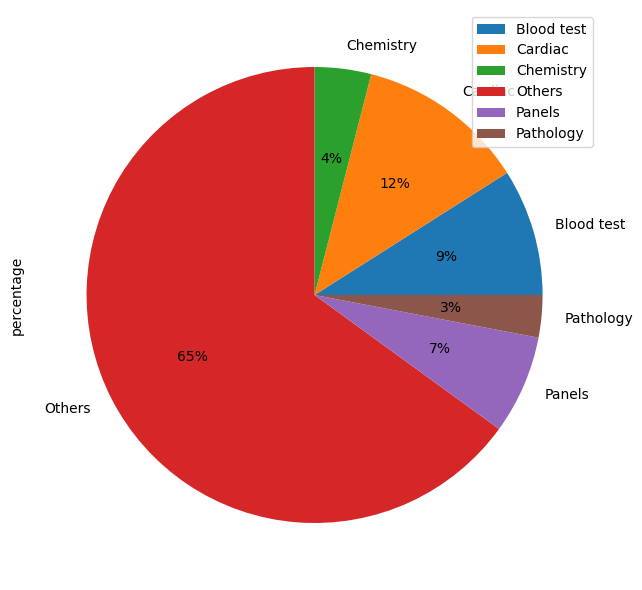

In [237]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the dataframes and necessary data are already defined
# ...

# Merge medicare_df with clm_uniq_cnt_per_hcpcs_desc_top100_df
prepped_input_w_cat_df = pd.merge(
    medicare_df,
    clm_uniq_cnt_per_hcpcs_desc_top100_df[['hcpcs_code', 'category']],
    on='hcpcs_code', how='left'
)

# Get the top 4 procedure categories
top_4_procedures_list = top_procedure_categories_df.reset_index()['category'].values.tolist()

# Prepare the input dataframe with top 4 categories
prepped_input_w_top_4_cat_df = prepped_input_w_cat_df.copy()
prepped_input_w_top_4_cat_df.loc[~prepped_input_w_top_4_cat_df.category.isin(top_4_procedures_list), 'category'] = 'Others'

# Create the pie chart dataframe
top_prcd_pie_chart_df = prepped_input_w_top_4_cat_df.dropna(subset=['npi_id']).groupby('category').agg({'claim_id': 'nunique'})
top_prcd_pie_chart_df['total'] = top_prcd_pie_chart_df.sum(axis=0)[0]
top_prcd_pie_chart_df['percentage'] = round(top_prcd_pie_chart_df['claim_id'] / top_prcd_pie_chart_df['total'], 2) * 100

# Display the information table
print(top_prcd_pie_chart_df)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the pie chart
top_prcd_plot_pie_chart = top_prcd_pie_chart_df.plot.pie(
    y='percentage', autopct='%1.0f%%', ax=ax
)

# Adjust layout
plt.tight_layout()
plt.show()

Aggregating Unique Claims for Cardiac Category by Year

In [240]:
total_num_uniq_cardiac_clm_by_year_df = cardiac_uniq_df.groupby('claim_year').agg(
    cardiac_clm_count=('claim_id', 'nunique')
)

Aggregating Unique Claims for Non-Cardiac Category by Year

In [243]:
total_num_uniq_clm_by_year_df = medicare_df.groupby('claim_year').agg(
    total_clm_count=('claim_id', 'nunique')
)

total_num_uniq_non_cardiac_clm_by_year_df = total_num_uniq_clm_by_year_df.join(
    total_num_uniq_cardiac_clm_by_year_df, how='left'
)

total_num_uniq_non_cardiac_clm_by_year_df['non_cardiac_clm_count'] = (
    total_num_uniq_non_cardiac_clm_by_year_df['total_clm_count'] - 
    total_num_uniq_non_cardiac_clm_by_year_df['cardiac_clm_count'].fillna(0)
).astype(int)

Combining DataFrames and Calculating Percentages

In [246]:
clm_count_by_year_cat_df = total_num_uniq_cardiac_clm_by_year_df.join(
    total_num_uniq_non_cardiac_clm_by_year_df[['non_cardiac_clm_count', 'total_clm_count']]
)

clm_count_by_year_cat_perc_df = clm_count_by_year_cat_df.copy()
clm_count_by_year_cat_perc_df['cardiac_clm_perc'] = round(
    (clm_count_by_year_cat_perc_df['cardiac_clm_count'] / clm_count_by_year_cat_perc_df['total_clm_count'] * 100)
).astype(int)
clm_count_by_year_cat_perc_df['non_cardiac_clm_perc'] = round(
    (clm_count_by_year_cat_perc_df['non_cardiac_clm_count'] / clm_count_by_year_cat_perc_df['total_clm_count'] * 100)
).astype(int)

clm_count_by_year_cat_perc_df = clm_count_by_year_cat_perc_df[['cardiac_clm_perc', 'non_cardiac_clm_perc']]
clm_count_by_year_cat_perc_df

,cardiac_clm_perc,non_cardiac_clm_perc
claim_year,,
2016.0,13,87
2017.0,13,87
2018.0,14,86


# 100% stacked bar graph

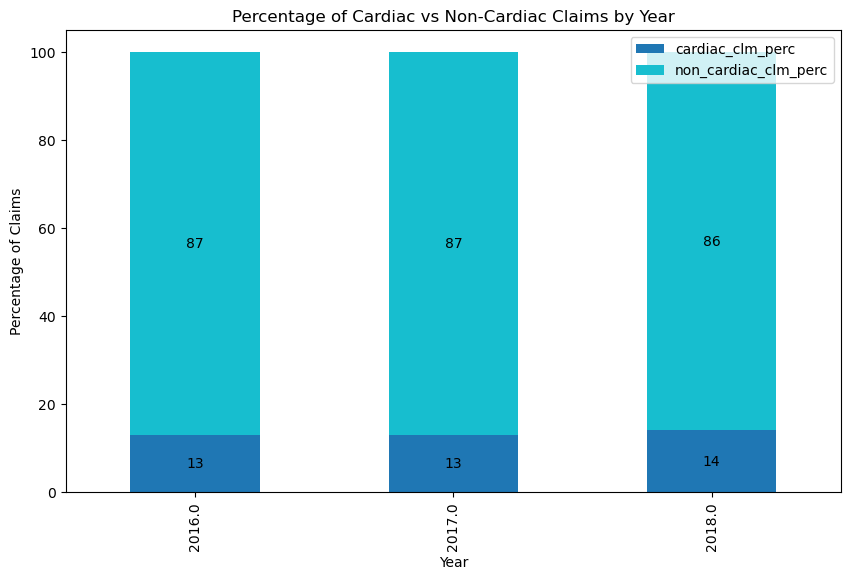

In [249]:
clm_count_by_year_cardiac_non_cardiac_100_stacked_bar_graph = clm_count_by_year_cat_perc_df[['cardiac_clm_perc', 'non_cardiac_clm_perc']].plot(
    kind='bar', 
    stacked=True, 
    colormap='tab10', 
    figsize=(10, 6)
)

# Adding labels and a title
clm_count_by_year_cardiac_non_cardiac_100_stacked_bar_graph.set_xlabel('Year')
clm_count_by_year_cardiac_non_cardiac_100_stacked_bar_graph.set_ylabel('Percentage of Claims')
clm_count_by_year_cardiac_non_cardiac_100_stacked_bar_graph.set_title('Percentage of Cardiac vs Non-Cardiac Claims by Year')

# Adding data labels inside the bars
for container in clm_count_by_year_cardiac_non_cardiac_100_stacked_bar_graph.containers:
    clm_count_by_year_cardiac_non_cardiac_100_stacked_bar_graph.bar_label(container, label_type='center')

Business Insights
The stability in the percentage of cardiac claims over these years indicates a consistent demand for cardiac-related pharmaceuticals and treatments. With cardiac issues being prevalent in the U.S., there is a consistent and growing demand for cardiac related pharmaceuticals and treatments.
The pharmaceutical company must employ aggressive tactics to penetrate the market further and capture a larger share:

Sales Force: There may be an opportunity to increase the sales force to capture a larger share of the growing market.
Intensive Promotion: Increase promotional activities and incentives for healthcare providers to prescribe your cardiac products.
Competitive Analysis: Conduct a thorough analysis of competitors’ strategies and performance to identify potential areas for competitive advantage.

## Q2. Evaluate the HCP behavior in context of claim volume from 2016-2018. How many HCPs are submitting 1 CVM claim; how many HCPs are associated with more than 10 claims, etc.? Once you perform this analysis, explain how this trend can influence the sales force deployment. That is, how would you segment the HCPs and how would you allocate In-Person (sales force) vs Non-Personal Promotions (NPP, i.e. Emails, Social Media, Digital etc.) efforts?

In [253]:
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date_x,patient_gender_x,patient_birth_date_y,patient_gender_y,patient_birth_date,patient_gender,claim_year,patient_age
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,1936-04-20,F,1936-04-20,F,1936-04-20,F,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53,1954-10-09,F,1954-10-09,F,1954-10-09,F,NaN,NaN
2,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79,1954-10-09,F,1954-10-09,F,1954-10-09,F,NaN,NaN
3,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79,1954-10-09,F,1954-10-09,F,1954-10-09,F,NaN,NaN
4,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79,1954-10-09,F,1954-10-09,F,1954-10-09,F,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,5/3/2018,99214,E782,105.49,1947-01-28,F,1947-01-28,F,1947-01-28,F,2018.0,71.0
198548,999919,12345,1.962494e+09,5/3/2018,90732,Z23,108.14,1947-01-28,F,1947-01-28,F,1947-01-28,F,2018.0,71.0
198549,999919,12345,1.962494e+09,5/3/2018,G0009,Z23,19.91,1947-01-28,F,1947-01-28,F,1947-01-28,F,2018.0,71.0
198550,999959,11445,1.548250e+09,9/24/2016,66984,H2512,838.19,1945-04-03,F,1945-04-03,F,1945-04-03,F,2016.0,71.0


In [255]:
cardiac_uniq_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12425 entries, 7 to 15867
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              12425 non-null  int64  
 1   patient_id            12425 non-null  int64  
 2   npi_id                12425 non-null  float64
 3   claim_date            12425 non-null  object 
 4   diagnosis_code        12425 non-null  object 
 5   claim_cost            12425 non-null  float64
 6   patient_birth_date_x  12425 non-null  object 
 7   patient_gender_x      12425 non-null  object 
 8   patient_birth_date_y  12425 non-null  object 
 9   patient_gender_y      12425 non-null  object 
 10  patient_birth_date    12425 non-null  object 
 11  patient_gender        12425 non-null  object 
 12  claim_year            10416 non-null  float64
 13  patient_age           10416 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.4+ MB


In [257]:
# Calculated the Number of Claims per HCP per Year by grouping the data by npi_id, claim_year, and count the number of claims.

In [259]:
hcp_claim_counts = cardiac_uniq_df.groupby(['npi_id', 'claim_year']).size().reset_index(name='claim_count')
hcp_claim_counts

,npi_id,claim_year,claim_count
0,1.003014e+09,2018.0,1
1,1.003015e+09,2018.0,1
2,1.003031e+09,2017.0,1
3,1.003058e+09,2016.0,1
4,1.003067e+09,2017.0,1
...,...,...,...
6474,1.992969e+09,2016.0,1
6475,1.992978e+09,2018.0,1
6476,1.992989e+09,2016.0,1
6477,1.000000e+10,2016.0,1


# Classifying HCPs into Segments based on the claim count

In [262]:
def classify_hcp(row):
    if row['claim_count'] == 1:
        return 'Disease Aware'
    elif 2 <= row['claim_count'] <= 4:
        return 'Trialists'
    elif 5 <= row['claim_count'] <= 9:
        return 'Rising Stars'
    elif row['claim_count'] >= 10:
        return 'High-Volume Prescribers'
    else:
        return 'Other'

hcp_claim_counts['segment'] = hcp_claim_counts.apply(classify_hcp, axis=1)

# Stacked bar chart to visualize the number of HCPs in each segment per year

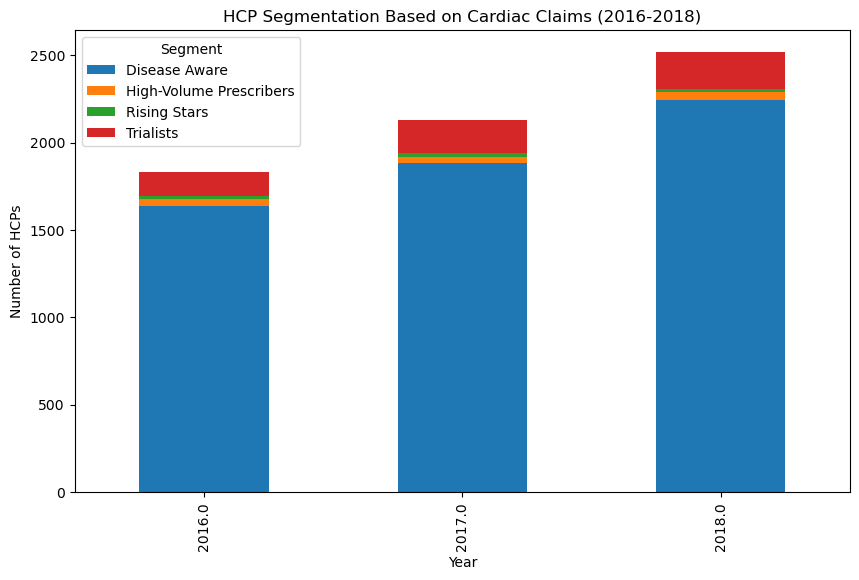

In [265]:
import matplotlib.pyplot as plt

segment_counts_by_year = hcp_claim_counts.groupby(['claim_year', 'segment']).size().unstack().fillna(0)
ax = segment_counts_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Number of HCPs')
ax.set_xlabel('Year')
ax.set_title('HCP Segmentation Based on Cardiac Claims (2016-2018)')
plt.legend(title='Segment')
plt.show()

# Table showing the corresponding values

In [268]:
result_table = hcp_claim_counts.pivot_table(index='claim_year', columns='segment', aggfunc='size', fill_value=0)
result_table

segment,Disease Aware,High-Volume Prescribers,Rising Stars,Trialists
claim_year,,,,
2016.0,1638,37,21,134
2017.0,1884,34,24,188
2018.0,2242,45,19,213


The results from the table provide valuable insights into how healthcare providers (HCPs) are interacting with cardiac claims, which can be used to inform sales force deployment and marketing strategies.¶

# Segment Analysis
Disease Aware: The number of HCPs in this segment is consistently increasing from 2016 to 2018. These are HCPs that have submitted only one CVM claim.
Sales Force Deployment: Limited in-person visits. Focus on Non-Personal Promotions (NPP) to increase awareness and provide education about cardiac conditions and treatments. Use emails, digital content, and social media to reach out to this segment.

High-Volume Prescribers: The number of HCPs in this segment has slightly increased over the years. These are HCPs with 10 or more CVM claims.
Sales Force Deployment: Prioritize in-person visits for this segment. Maintain strong relationships, provide comprehensive support, and consider them for speaker programs and other engagements.

Rising Stars: The number of HCPs in this segment has been fluctuating over the years. These are HCPs with 5 to 9 CVM claims.
Sales Force Deployment: Increase in-person visits to build relationships and provide support. Focus on educating them about the full range of products and services available, and encourage the adoption of more advanced treatments if applicable.

Trialists: The number of HCPs in this segment is increasing, indicating a growing interest in CVM treatments. These are HCPs with 2 to 4 CVM claims.
Sales Force Deployment: Balance between in-person visits and NPP. Use in-person visits to strengthen relationships, provide samples, and encourage product trials. Complement with digital marketing to provide additional information and support.

## Q3. Evaluate the Patient Age demographics in the context of claim volume from 2016-2018. Bucket the patients into groups based on their age and explain the trends. How would you position the Marketing Budgets and the Promotions with respect to the changing landscape of the CVM claims and the respective patient segments? 

In [277]:
# Fill NaN values in 'claim_year' with 0 or another value like the median year
medicare_df['claim_year'] = medicare_df['claim_year'].fillna(0).astype(int)


In [279]:
def categorize_age(age):
    if 18 <= age <= 59:
        return '18-59'
    elif 60 <= age <= 69:
        return '60-69'
    elif 70 <= age <= 79:
        return '70-79'
    elif age >= 80:
        return '80+'
    else:
        return 'Other'

cardiac_uniq_df['age_group'] = cardiac_uniq_df['patient_age'].apply(categorize_age)

In [281]:
age_group_counts = cardiac_uniq_df.groupby(['claim_year', 'age_group']).size().unstack().fillna(0)

In [283]:
yoy_change = age_group_counts.pct_change(fill_method ='pad') * 100

C:\Users\rahul\AppData\Local\Temp\ipykernel_10068\982114122.py:1: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yoy_change = age_group_counts.pct_change(fill_method ='pad') * 100


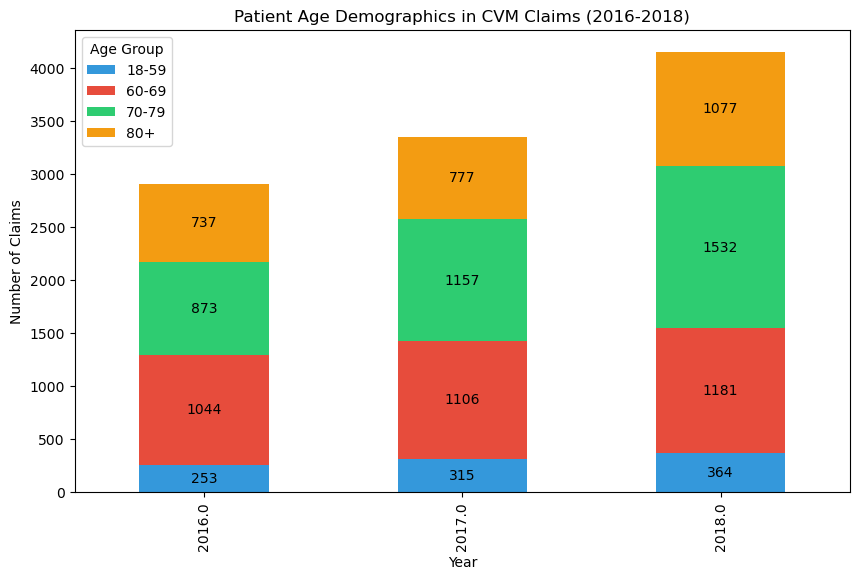

In [285]:
# Plot bar chart
ax = age_group_counts.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6),
    color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
)

# Adding text annotations
height_accumulate = [0] * len(age_group_counts)
for i, age_group in enumerate(age_group_counts.columns):
    for j, val in enumerate(age_group_counts[age_group]):
        ax.text(j, height_accumulate[j] + val/2, int(val), ha='center', va='center')
        height_accumulate[j] += val

# Set labels and title
ax.set_ylabel('Number of Claims')
ax.set_xlabel('Year')
ax.set_title('Patient Age Demographics in CVM Claims (2016-2018)')

# Show legend
plt.legend(title='Age Group')

# Show plot
plt.show()


In [287]:
yoy_change = age_group_counts.pct_change(fill_method ='pad') * 100
yoy_change

C:\Users\rahul\AppData\Local\Temp\ipykernel_10068\1067385779.py:1: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yoy_change = age_group_counts.pct_change(fill_method ='pad') * 100


age_group,18-59,60-69,70-79,80+
claim_year,,,,
2016.0,NaN,NaN,NaN,NaN
2017.0,24.505929,5.938697,32.531501,5.427408
2018.0,15.555556,6.781193,32.411409,38.610039


# To enhance engagement and optimize resource allocation, it's imperative to analyze the shifting trends in cardiovascular management (CVM) claims across patient age segments from 2016 to 2018.
Age Group 18-59:
Trend: Growing significantly with a 19.3% increase in 2017 and a further 10.2% increase in 2018. Strategy: Invest heavily in digital marketing, social media, and innovative healthcare apps tailored according to the demographic. Focus on preventive care, awareness, and education about cardiovascular health. Budget Allocation: High. This is a growing segment and capturing their attention early could result in long-term customer loyalty.

Age Group 60-69:
Trend: A steady increase with a 4.9% increase in 2017 and a 2.9% increase in 2018. Strategy: Utilize a mix of traditional and digital marketing channels. Emphasize on easy-to-understand content, preventive measures, and treatment options. Budget Allocation: Moderate. Ensure visibility and provide valuable information to encourage trust and reliability.

Age Group 70-79:
Trend: Rapid growth with a 34.0% increase in 2017 and a 25.7% increase in 2018. Strategy: Focus on traditional media like TV and print, community events, and direct mail. Ensure the content is clear, concise, and easily accessible. Highlight the effectiveness and ease of use of your products/services. Budget Allocation: High. This age group is showing significant growth in CVM claims and should be a primary focus for in-person engagements and educational material.

Age Group 80+:
Trend: Mixed with a slight decrease of 0.1% in 2017, followed by a significant increase of 37.4% in 2018. Strategy: Prioritize accessibility and simplicity. Use channels such as direct mail, community outreach, and TV. Consider caregiver outreach programs as well. Budget Allocation: Moderate to High. Despite the slight decrease in 2017, the dramatic increase in 2018 indicates a potential shift in this demographic that should not be ignored.

Overall Strategy:
Innovation for Younger Demographics: Focus on innovative solutions and digital outreach for the younger demographics (18-59). Education and Accessibility for Older Demographics: Provide clear, accessible information and support for the older demographics, particularly the 70-79 and 80+ age groups, which are showing significant growth in CVM claims. Balanced Approach for 60-69: Maintain a balanced marketing approach for the 60-69 age group, utilizing both traditional and digital channels. By aligning your marketing strategies and budget allocations with these trends, you can more effectively reach and engage each patient segment, ultimately driving awareness, education, and adoption of cardiovascular treatments and services.

# Additional Analysis:

# Calculating and analyzing the average claim amount submitted by each HCP. Finding out how do these averages vary across providers, and who are the top and bottom five providers based on the average claim cost

In [292]:
#Checking number of unique HCPs in the given data

unique_hcps = cardiac_uniq_df['npi_id'].nunique()
print("Number of unique HCPs:", unique_hcps)

Number of unique HCPs: 7499


In [294]:
# Calculating the average claim amount per provider
average_claim_per_hcp = cardiac_uniq_df.groupby('npi_id')['claim_cost'].mean().reset_index()

# Renaming the columns for better readability
average_claim_per_hcp.columns = ['npi_id', 'average_claim_amount']

# Sorting the DataFrame based on average claim amount in descending order to identify high-cost providers
average_claim_per_hcp = average_claim_per_hcp.sort_values(by='average_claim_amount', ascending=False)

print(average_claim_per_hcp)

            npi_id  average_claim_amount
681   1.083721e+09             66898.860
6409  1.861424e+09             36119.160
6900  1.922056e+09             20757.465
75    1.013043e+09             17768.180
5987  1.790787e+09             13782.280
...            ...                   ...
7092  1.942299e+09                 0.000
1369  1.184620e+09                 0.000
1373  1.184621e+09                 0.000
6626  1.891752e+09                -0.230
5427  1.720058e+09               -58.650

[7499 rows x 2 columns]


# Data Check 16: Since we have negative claim amount values, I am finding out if there are any negative claim costs in the cardiac data frame to see if there was any error in the previous code

In [297]:
#Filter the DataFrame to include only negative claim costs
negative_claims_df = cardiac_uniq_df[cardiac_uniq_df['claim_cost'] < 0]

negative_claims_df

,claim_id,patient_id,npi_id,claim_date,diagnosis_code,claim_cost,patient_birth_date_x,patient_gender_x,patient_birth_date_y,patient_gender_y,patient_birth_date,patient_gender,claim_year,patient_age,age_group
1681,628642,12670,1.720058e+09,2017-05-11,Z0000,-58.65,1947-10-17,F,1947-10-17,F,1947-10-17,F,NaN,NaN,Other
2233,779870,11116,1.891752e+09,2016-10-03,E782,-0.23,1940-04-02,F,1940-04-02,F,1940-04-02,F,NaN,NaN,Other
